In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import joblib

In [3]:
df=pd.read_csv('plant_growth_simulated.csv')

In [4]:
df.head()

,PlantID,Species,Sunlight(Hours/Day),Water(L/Day),GrowthDays,FinalHeight(cm)
0,P0,Tomato,5.303700,0.652419,22,10.18
1,P1,Aloe Vera,9.072025,0.440069,19,11.72
2,P2,Cactus,3.669201,0.990641,17,9.98
3,P3,Basil,6.022019,0.129599,14,6.02
4,P4,Tomato,5.278320,0.307658,19,6.59


In [5]:
df.describe()

,Sunlight(Hours/Day),Water(L/Day),GrowthDays,FinalHeight(cm)
count,500.000000,500.000000,500.000000,500.000000
mean,6.851668,0.561168,18.246000,9.785680
std,2.835809,0.257930,6.822799,2.894953
min,2.031471,0.102057,7.000000,1.870000
25%,4.497851,0.337796,13.000000,7.580000
50%,6.818916,0.554673,18.000000,9.855000
75%,9.284489,0.794103,23.250000,11.837500
max,11.986047,0.999623,30.000000,17.550000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PlantID              500 non-null    object 
 1   Species              500 non-null    object 
 2   Sunlight(Hours/Day)  500 non-null    float64
 3   Water(L/Day)         500 non-null    float64
 4   GrowthDays           500 non-null    int64  
 5   FinalHeight(cm)      500 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 23.6+ KB


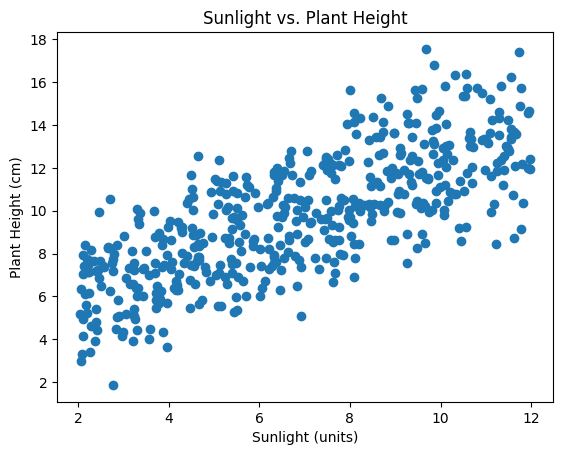

In [8]:
plt.scatter(df['Sunlight(Hours/Day)'], df['FinalHeight(cm)'])
plt.xlabel('Sunlight (units)')
plt.ylabel('Plant Height (cm)')
plt.title('Sunlight vs. Plant Height')
plt.show()

In [9]:
x=df[['Sunlight(Hours/Day)']]
y=df['FinalHeight(cm)']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred = model.predict(x_test)

In [15]:
print('Coefficient:', model.coef_[0])
print('Intercept:', model.intercept_)
print('R² score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

Coefficient: 0.7631813247797825
Intercept: 4.571382116198556
R² score: 0.5457811295214343
MSE: 4.24232378085471


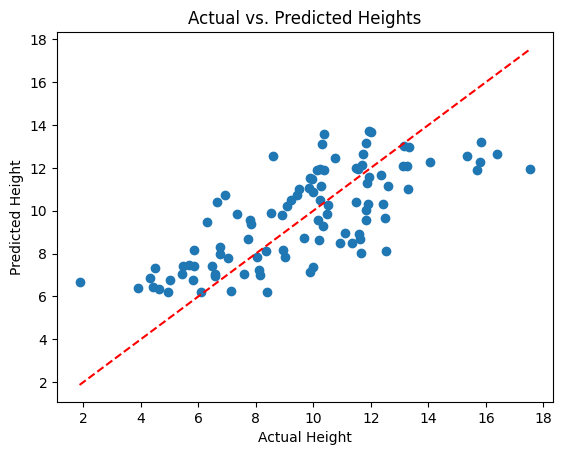

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Height')
plt.ylabel('Predicted Height')
plt.title('Actual vs. Predicted Heights')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()
